# Tutorial 3 - CNN

Esse tutorial tem como objetivo trabalhar com a rede neural convolucional (CNN). Uma boa apresentação desta rede é o material do [deeplearningbook.org](http://www.deeplearningbook.org/contents/convnets.html). 

As implementações serão baseadas nos seguintes tutoriais:

* [Lab 11 do Material ML/DL for everyone](https://drive.google.com/drive/u/0/folders/0B41Zbb4c8HVyMHlSQlVFWWphNXc)
* [Implementação da CNN do curso da Udacity](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/3_NeuralNetworks/convolutional_network.py)

Vamos trabalhar de forma parecida ao tutorial da MLP. Primeiro vou aplicar à base do [MNIST](http://yann.lecun.com/exdb/mnist/) e em seguida aplicar para uma tarefa mais difícil que é a classificação da base [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html). 

In [5]:
#Imports necessários
from IPython.display import YouTubeVideo, Image


Antes de começar a implementação, vamos entender um pouco como funciona a CNN.

Para começar recomendo o vídeo a seguir que tem uma rápida explicação do tema:

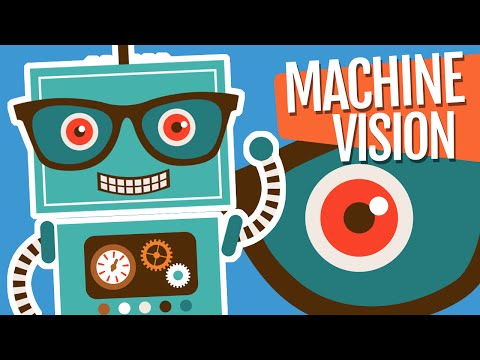

In [6]:
# Breve explicação sobre CNN
# Vídeo por: Deeplearning.TV
YouTubeVideo('JiN9p5vWHDY')

Algumas anotações e imagens foram tiradas das notas de aula do curso [CS231n Convolutional Neural Networks for Visual Recognition](http://cs231n.stanford.edu/) disponível [neste link](http://cs231n.github.io/convolutional-networks/). 

O primeiro passo para entender a arquitura da CNN é tentar enxergar sua diferença para um rede neural tradicional. As notas de aulas linkadas anteriormente linkadas anteriormente discute bem isso. Vale a pena dar uma lida. 

Brevemente, vamos analisar as imagem a seguir. A primeira corresponde a uma MLP e a segunda à arquitetura de uma CNN. 


*Fonte das Imagens: http://cs231n.github.io/convolutional-networks/*


In [15]:
print("Figura 1: Arquitetuta da MLP")
Image(url="http://cs231n.github.io/assets/nn1/neural_net2.jpeg",width=400)

Figura 1: Arquitetuta da MLP


Se a gente imaginar que a entrada desta rede é uma imagem 32x32x3 (32 de largura, 32 de altura e 3 de profundidade: canais RGB, por exemplo), teríamos um vetor com 3072 posições. Em outras palavras 3072 pesos multiplicados pela entrada e conectados a todos os demais neurônios da *hidden layer*. É fácil enxergar que se aumentarmos essa imagem para 200x200x3, por exemplo, a quantidade de parâmetros envolvidos ao longo da rede aumenta consideravelmente. Esse fato tem várias implicações como, por exemplo, escalar uma rede desse tipo para trabalhar com imagens. 

In [14]:
print("Figura 2: Arquitetuta da CNN")
Image(url="http://cs231n.github.io/assets/cnn/cnn.jpeg", width=400)

Figura 2: Arquitetuta da CNN


Agora, se olharmos para a arquitetura da CNN, vamos ver que esse processo é um pouco mais simplificado porque os neurônios são agrupados em uma estrutura em cubo (*width*x*height*x*depth*). Organizados dessa forma, os neurônios estarão conectados a apenas uma região da camanda anterior, ao invés de todos os neurônios como na arquitetura MLP (isso será melhor abordado quando detalhar as operações aplicadas nas camadas). 

Esse trecho tirado do [DeepLearningBook](http://www.deeplearningbook.org) explica bem o efeito dessa mudança na complexidade computacional: 

> This means that we need to store fewer parameters, which both reduces the memory requirements of the model and improves its statistical eﬃciency. It also means that computing the output requires fewer operations. These improvements in eﬃciency are usually quite large. If there are $m$ inputs and $n$ outputs, then matrix multiplication requires $m×n$ parameters and the algorithms used in practice have $O(m × n)$ runtime (per example). If we limit the number of connections each output may have to $k$, then the sparsely connected approach requires only $k×n$ parameters and $O(k × n)$ runtime. For many practical applications, it is possible to obtain good performance on the machine learning task while keeping $k$ several orders of magnitude smaller than $m$.

```
ver as outras vantagens: parameter sharing and equivariant representations
```

## Arquitetura da CNN 

Uma CNN é uma sequência de camadas e cada camada transforma uma estrutura em cubo em outra estrutura em cubo de acordo com uma série de trasformações. Podemos serparar tais camadas em três tipos: *convolutional layer*, *pooling layer* e *fully-connceted layer*. Para algumas arquiteturas uma camada *RELU* também pode aparecer.

Para ilustrar, vamos ver o caso de um problema de classificação representado pela imagem a seguir:

*Fonte da imagem: http://cs231n.github.io/convolutional-networks/*

In [23]:
Image(url="http://cs231n.github.io/assets/cnn/convnet.jpeg", width=700)

Observe que as camadas são aplicadas várias vezes. Isso depende da arquitetura que vamos escolher para nosso problema. Observe que a entrada e a saída de cada camada é uma estrutura em cubo (widthxheightxdepth) comentada anteriormente. A saída, para esse problema, é um vetor de classificação. 

Uma versão animada e rodando "ao vivo" no navegador pode ser visto em: http://cs231n.stanford.edu/ (Ps: muito bom :P)

Para melhor entendimento vale dar um olhada na explicação de cada camada em http://cs231n.github.io/convolutional-networks/#layers. Abordarei alguns aspectos a seguir.

### ### Este tutorial está em desenvolvimento ### ### 